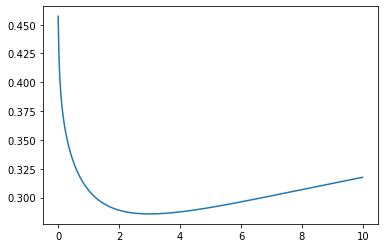

In [22]:
#!/usr/bin/python3.7
#regularizedPortfolioOptimization.ipynb
#Parth Parakh
#purpose: Finding the appropriate value of lambda for regularised Markowitz portfolio
#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
#---------------------------------------------------------------------

if __name__ == "__main__":

    X = np.loadtxt(open("XReturns.csv", "rb"), delimiter=",")

    xTrain = X[0:120,:];
    xTest = X[121:200,:];
    
    xTrain = xTrain.transpose();
    xTest = xTest.transpose();
    
    CTrain = np.cov(xTrain);
    CTest = np.cov(xTest);
    p=48;
    vol2Test = [];
    L = [];

    for lambdaa in np.arange(0,10,0.01):
        invCTrain = np.linalg.inv(CTrain+lambdaa*np.eye(p));
        z = np.sum(invCTrain);
        w = np.sum(invCTrain,axis=1)/z;
        wT = np.transpose(w);
        c = wT@CTest@w
        vol2Test = np.append(vol2Test,c);
        L = np.append(L,lambdaa);
        
    plt.plot(L,vol2Test)